In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress, gaussian_kde

import math

In [ ]:
Hoe = pd.read_csv("hoevsoere1hr_uvw.csv")
Hoe.columns = ['u', 'v', 'w']
print(Hoe.head())

           u         v         w
0  12.314115  0.001521  0.109761
1  12.145154 -0.061623  0.000982
2  12.078512 -0.045743  0.201192
3  12.228003  0.113929  0.150276
4  12.238973 -0.094025 -0.149460


In [ ]:
f_s = 20 #Hz, sampling frequency

# Data 1

## a)

In [ ]:
u_mean=np.mean(np.abs(Hoe['u']))
v_mean=np.mean(np.abs(Hoe['v']))
w_mean=np.mean(np.abs(Hoe['w']))

print(f'the mean value of u is {u_mean}')
print(f'the mean value of v is {v_mean}')
print(f'the mean value of w is {w_mean}')


u_var=np.var(np.abs(Hoe['u']))
v_var=np.var(np.abs(Hoe['v']))
w_var=np.var(np.abs(Hoe['w']))

print(f'the variance value of u is {u_var}')
print(f'the variance value of v is {v_var}')
print(f'the variance value of w is {w_var}')

the mean value of u is 13.151562499048978
the mean value of v is 0.6770315480717111
the mean value of w is 0.4824558580409619
the variance value of u is 1.8940270896532907
the variance value of v is 0.27355235323061644
the variance value of w is 0.15534414727789828


## b)

In [ ]:
Hoe["uw"] = Hoe["u"]*Hoe["w"]
print(Hoe.head())
u_star= (-1*np.mean(Hoe['uw']))**(1/2)
print(u_star)

           u         v         w        uw
0  12.314115  0.001521  0.109761  1.351612
1  12.145154 -0.061623  0.000982  0.011930
2  12.078512 -0.045743  0.201192  2.430095
3  12.228003  0.113929  0.150276  1.837576
4  12.238973 -0.094025 -0.149460 -1.829231
0.529076195165561


## c)

Split spectra

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16876\450569015.py:52: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim((np.min(f_l_1),np.max(f_l_1)))


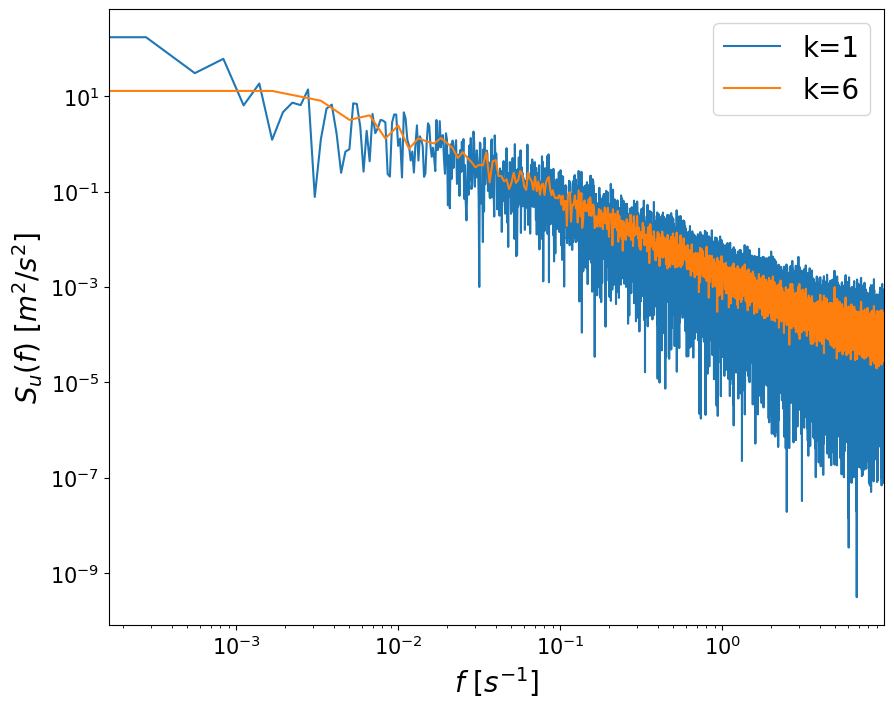

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16876\450569015.py:68: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim((np.min(f_l_1),np.max(f_l_1)))


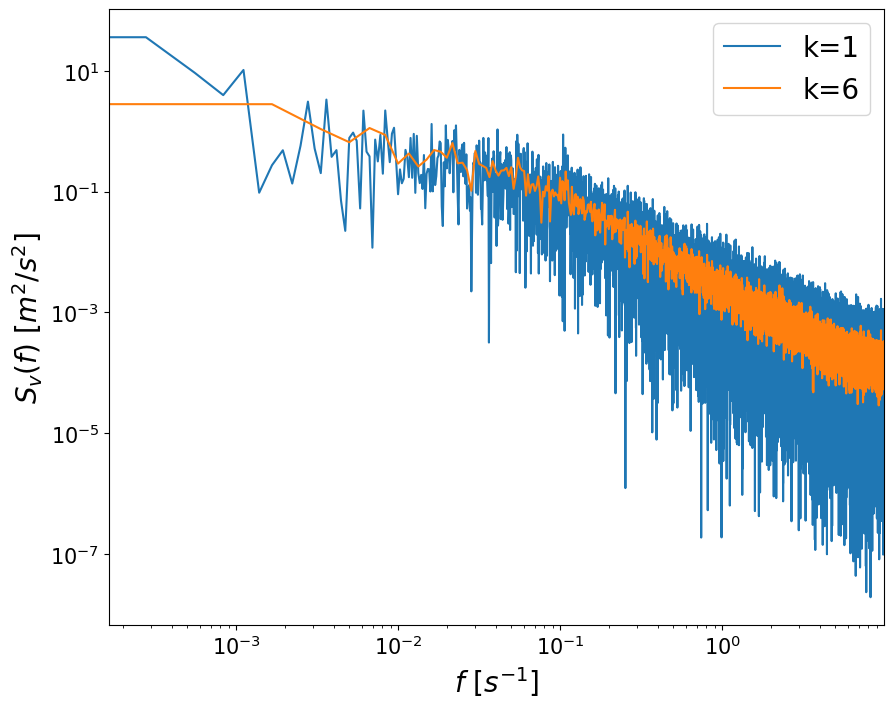

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16876\450569015.py:82: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim((np.min(f_l_1),np.max(f_l_1)))


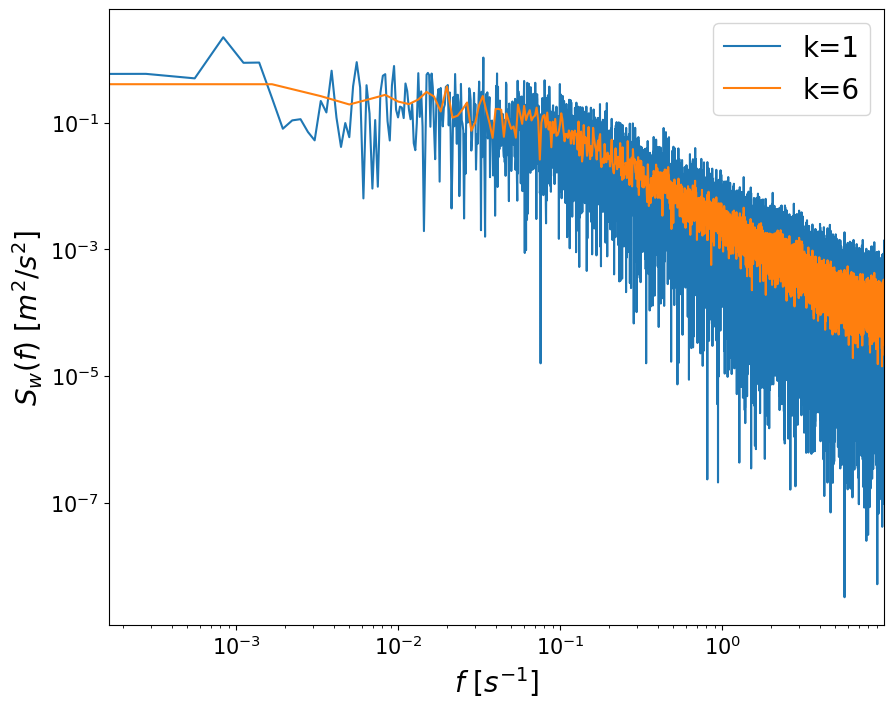

In [ ]:
def split_and_calculate_spectra(hoevsoere, k_guess):
    N = len(hoevsoere.u)
    N_series = N // k_guess
    spectra_avg_u = []
    spectra_avg_v = []
    spectra_avg_w = []

    for k in range(k_guess):
        Series_k_u = hoevsoere.u[k * N_series:(k + 1) * N_series]
        Series_k_v = hoevsoere.v[k * N_series:(k + 1) * N_series]
        Series_k_w = hoevsoere.w[k * N_series:(k + 1) * N_series]

        # Frequency Estimations
        N_f = N_series // 2
        f_l = np.fft.fftfreq(N_series, 1 / f_s)[:N_f]

        # Spectra Calculation
        spectra_u = 1/(2*np.pi*N_series*f_s)*np.abs(np.fft.fft(Series_k_u))**2

        spectra_avg_u.append(spectra_u[:N_f])
        
        spectra_v = 1/(2*np.pi*N_series*f_s)*np.abs(np.fft.fft(Series_k_v))**2

        spectra_avg_v.append(spectra_v[:N_f])
        
        spectra_w = 1/(2*np.pi*N_series*f_s)*np.abs(np.fft.fft(Series_k_w))**2

        spectra_avg_w.append(spectra_w[:N_f])

    return f_l, np.mean(spectra_avg_u, axis=0), np.mean(spectra_avg_v, axis=0), np.mean(spectra_avg_w, axis=0), Series_k_u, Series_k_v, Series_k_w

k_guess = 6  
f_l_6, spectra_avg_u_6, spectra_avg_v_6, spectra_avg_w_6, Series_k_u_1, Series_k_v_1, Series_k_w_1 = split_and_calculate_spectra(Hoe, k_guess)

k_guess = 1 
f_l_1, spectra_avg_u_1, spectra_avg_v_1, spectra_avg_w_1, Series_k_u_6, Series_k_v_6, Series_k_w_6 = split_and_calculate_spectra(Hoe, k_guess)

spectra_avg_u_6[0] = spectra_avg_u_6[1]
spectra_avg_u_1[0] = spectra_avg_u_1[1]

plt.figure(figsize = (10,8))
plt.plot(f_l_1, spectra_avg_u_1)
plt.plot(f_l_6, spectra_avg_u_6)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$S_u(f) \ [m^2/s^2]$", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("$f \ [s^{-1}]$", size = 20)
plt.legend(("k=1", "k=6"), fontsize = "20")
#plt.grid(visible=True, which="both")
plt.xlim((np.min(f_l_1),np.max(f_l_1)))
plt.show()

spectra_avg_v_1[0] = spectra_avg_v_1[1]

plt.figure(figsize = (10,8))
plt.plot(f_l_1, spectra_avg_v_1)
plt.plot(f_l_6, spectra_avg_v_6)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$S_v(f) \ [m^2/s^2]$", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("$f \ [s^{-1}]$", size = 20)
plt.legend(("k=1", "k=6"), fontsize = "20")
#plt.grid(visible=True, which="both")
plt.xlim((np.min(f_l_1),np.max(f_l_1)))
plt.show()

plt.figure(figsize = (10,8))
plt.plot(f_l_1, spectra_avg_w_1)
plt.plot(f_l_6, spectra_avg_w_6)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$S_w(f) \ [m^2/s^2]$", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("$f \ [s^{-1}]$", size = 20)
plt.legend(("k=1", "k=6"), fontsize = "20")
#plt.grid(visible=True, which="both")
plt.xlim((np.min(f_l_1),np.max(f_l_1)))
plt.show()

## d)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16876\2709158288.py:223: RuntimeWarning: invalid value encountered in divide
  simiu_1_u = u_star**2*100*n_1/((1+50*n_1)**(5/3)*decade_1)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16876\2709158288.py:224: RuntimeWarning: invalid value encountered in divide
  simiu_6_u = u_star**2*100*n_6/((1+50*n_6)**(5/3)*decade_6[0:53])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16876\2709158288.py:229: RuntimeWarning: invalid value encountered in divide
  simiu_1_v = u_star**2*7.5*n_1/((1+9.5*n_1)**(5/3)*decade_1)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16876\2709158288.py:230: RuntimeWarning: invalid value encountered in divide
  simiu_6_v = u_star**2*7.5*n_6/((1+9.5*n_6)**(5/3)*decade_6[0:53])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16876\2709158288.py:235: RuntimeWarning: invalid value encountered in divide
  simiu_1_w = u_star**2*1.68*n_1/((1+10*n_1**(5/3))*decade_1)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16876\2709158288.py

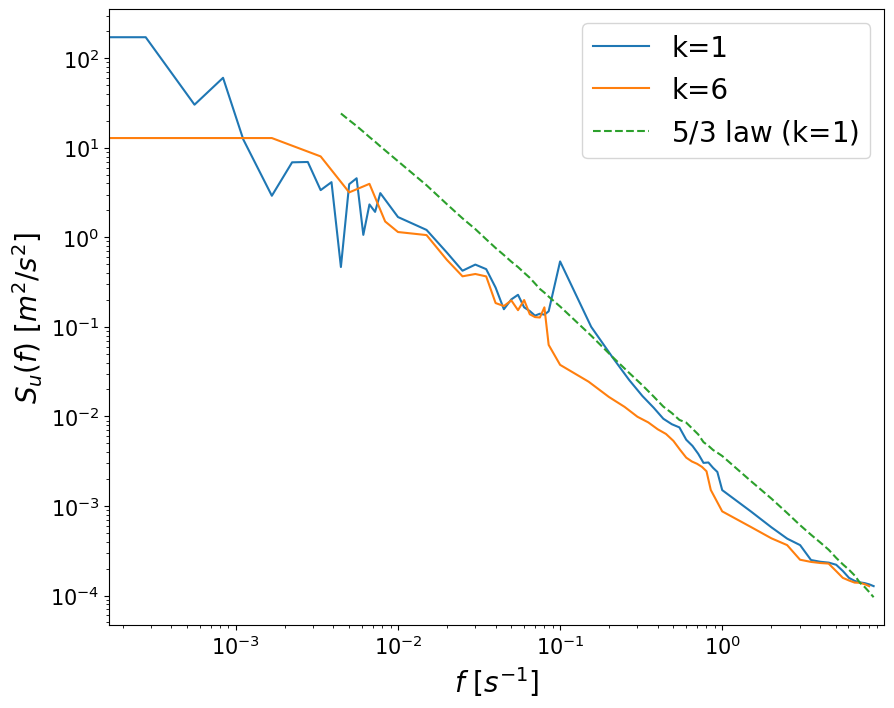

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16876\2709158288.py:293: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim((np.min(f_l_1),np.max(f_l_1)))


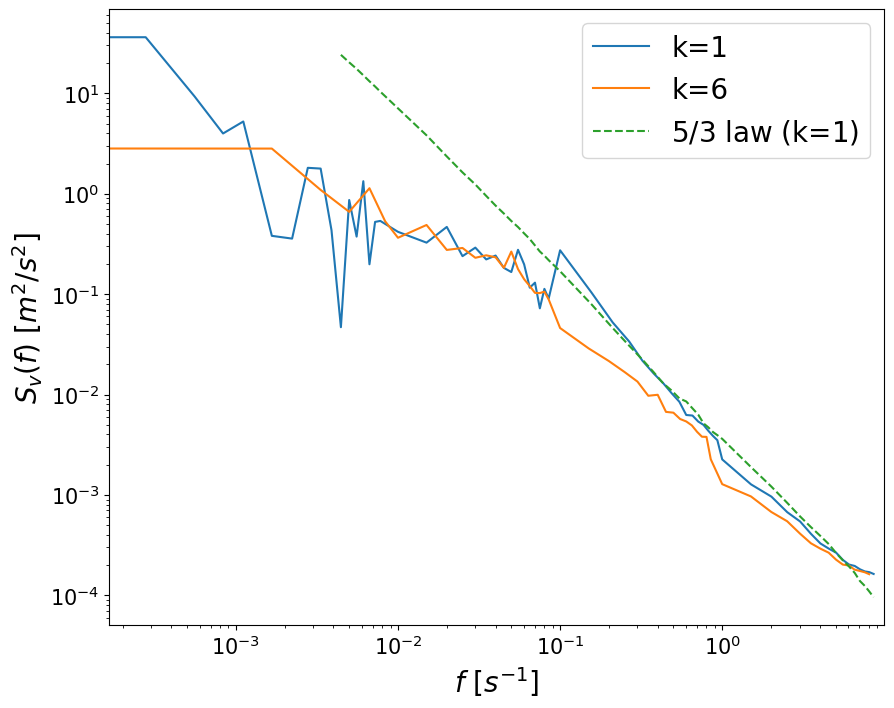

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16876\2709158288.py:311: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim((np.min(f_l_1),np.max(f_l_1)))


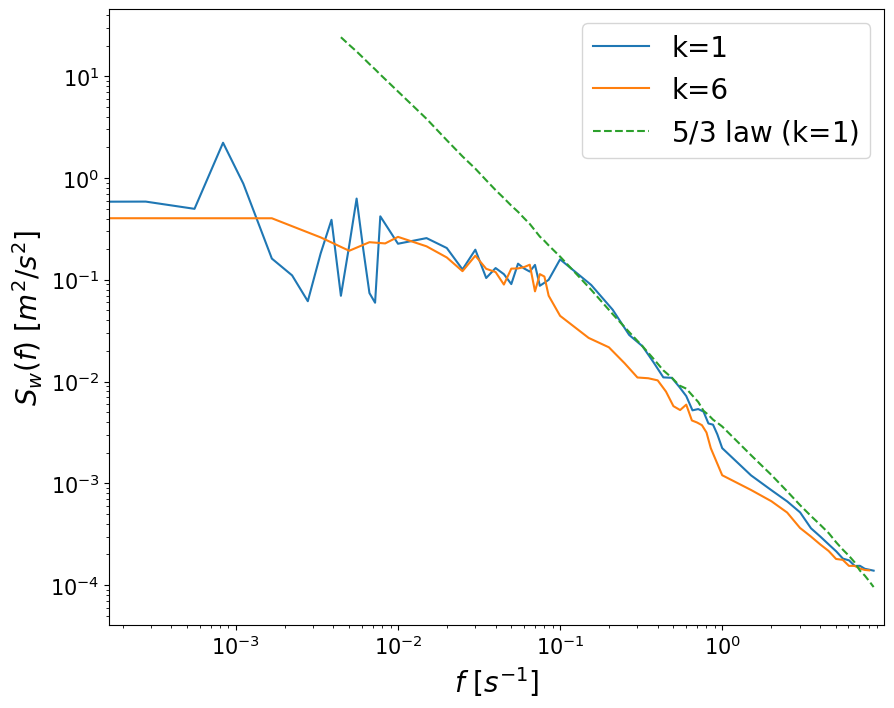

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16876\2709158288.py:365: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim((np.min(f_l_1), np.max(f_l_1)))


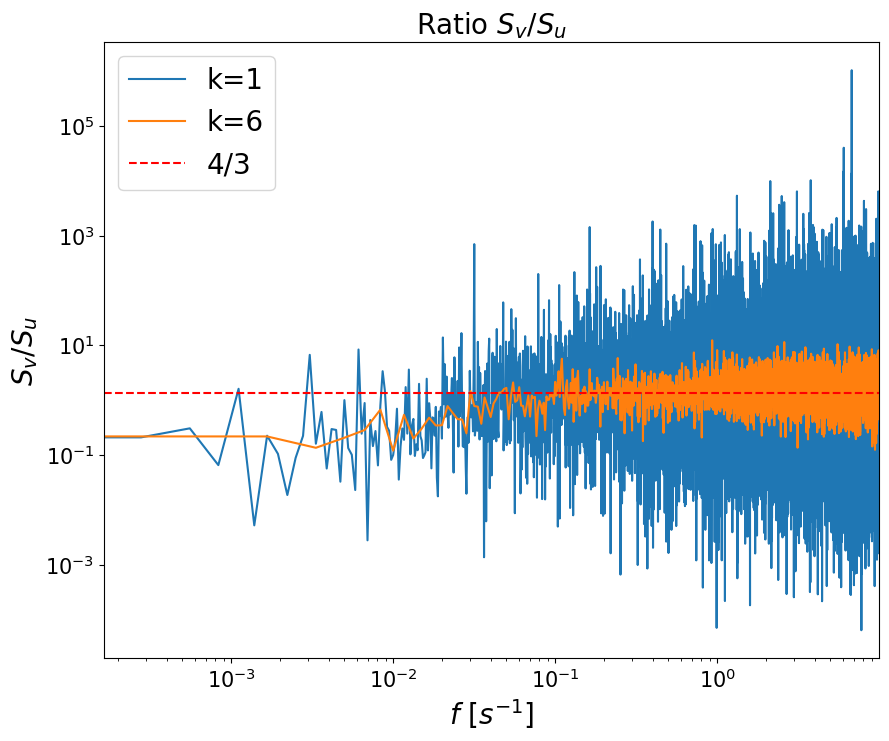

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16876\2709158288.py:381: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim((np.min(f_l_1), np.max(f_l_1)))


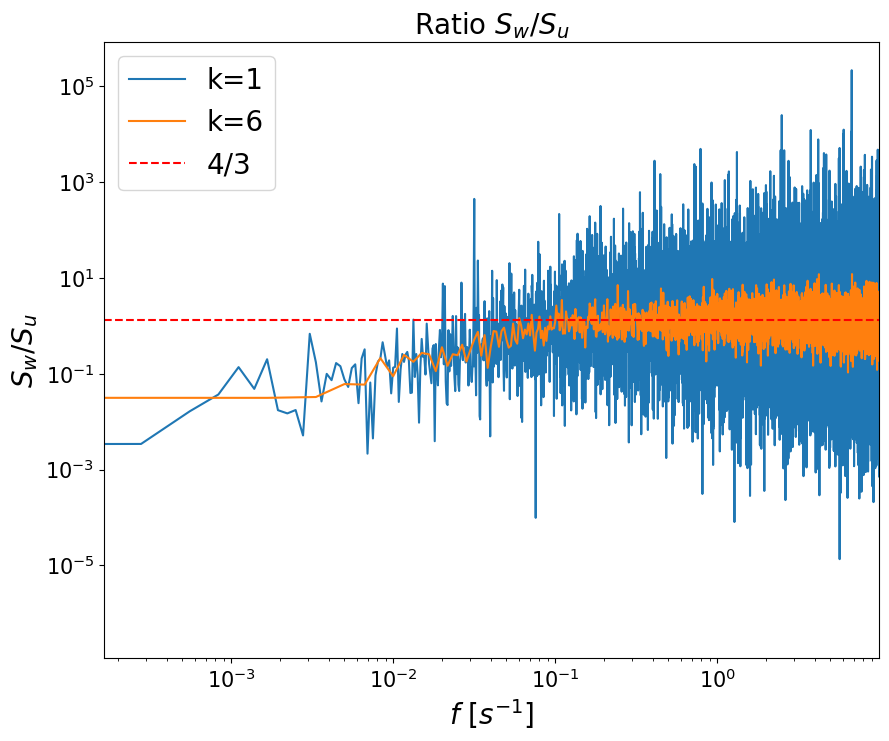

In [ ]:
decade_1_1 = f_l_1[f_l_1 <= 10e-4]
decade_1_2 = f_l_1[(f_l_1 <= 10e-3) & (f_l_1 > 10e-4)]
decade_1_3 = f_l_1[(f_l_1 <= 10e-2) & (f_l_1 > 10e-3)]
decade_1_4 = f_l_1[(f_l_1 <= 10e-1) & (f_l_1 > 10e-2)]
decade_1_5 = f_l_1[(f_l_1 <= 10e0) & (f_l_1 > 10e-1)]


decade_6_1 = f_l_6[f_l_6 <= 10e-4]
decade_6_2 = f_l_6[(f_l_6 <= 10e-3) & (f_l_6 > 10e-4)]
decade_6_3 = f_l_6[(f_l_6 <= 10e-2) & (f_l_6 > 10e-3)]
decade_6_4 = f_l_6[(f_l_6 <= 10e-1) & (f_l_6 > 10e-2)]
decade_6_5 = f_l_6[(f_l_6 <= 10e0) & (f_l_6 > 10e-1)]

# ----------------------------------------------------------------------------
# Obtaining spectra values within the decades

group_1_1_u = spectra_avg_u_1[0:len(decade_1_1)]
group_1_1_v = spectra_avg_v_1[0:len(decade_1_1)]
group_1_1_w = spectra_avg_w_1[0:len(decade_1_1)]

group_1_2_u = spectra_avg_u_1[len(decade_1_1):len(decade_1_2)]
group_1_2_v = spectra_avg_v_1[len(decade_1_1):len(decade_1_2)]
group_1_2_w = spectra_avg_w_1[len(decade_1_1):len(decade_1_2)]

group_1_3_u = spectra_avg_u_1[len(decade_1_2):len(decade_1_3)]
group_1_3_v = spectra_avg_v_1[len(decade_1_2):len(decade_1_3)]
group_1_3_w = spectra_avg_w_1[len(decade_1_2):len(decade_1_3)]

group_1_4_u = spectra_avg_u_1[len(decade_1_2):len(decade_1_4)]
group_1_4_v = spectra_avg_v_1[len(decade_1_2):len(decade_1_4)]
group_1_4_w = spectra_avg_w_1[len(decade_1_2):len(decade_1_4)]

group_1_5_u = spectra_avg_u_1[len(decade_1_4):len(decade_1_5)]
group_1_5_v = spectra_avg_v_1[len(decade_1_4):len(decade_1_5)]
group_1_5_w = spectra_avg_w_1[len(decade_1_4):len(decade_1_5)]

group_6_1_u = spectra_avg_u_6[0:len(decade_6_1)]
group_6_1_v = spectra_avg_v_6[0:len(decade_6_1)]
group_6_1_w = spectra_avg_w_6[0:len(decade_6_1)]

group_6_2_u = spectra_avg_u_6[len(decade_6_1):len(decade_6_2)]
group_6_2_v = spectra_avg_v_6[len(decade_6_1):len(decade_6_2)]
group_6_2_w = spectra_avg_w_6[len(decade_6_1):len(decade_6_2)]

group_6_3_u = spectra_avg_u_6[len(decade_6_2):len(decade_6_3)]
group_6_3_v = spectra_avg_v_6[len(decade_6_2):len(decade_6_3)]
group_6_3_w = spectra_avg_w_6[len(decade_6_2):len(decade_6_3)]

group_6_4_u = spectra_avg_u_6[len(decade_6_3):len(decade_6_4)]
group_6_4_v = spectra_avg_v_6[len(decade_6_3):len(decade_6_4)]
group_6_4_w = spectra_avg_w_6[len(decade_6_3):len(decade_6_4)]

group_6_5_u = spectra_avg_u_6[len(decade_6_4):len(decade_6_5)]
group_6_5_v = spectra_avg_v_6[len(decade_6_4):len(decade_6_5)]
group_6_5_w = spectra_avg_w_6[len(decade_6_4):len(decade_6_5)]

speed_1_1_u = Hoe.u[0:len(decade_1_1)]
speed_1_1_v = Hoe.v[0:len(decade_1_1)]
speed_1_1_w = Hoe.w[0:len(decade_1_1)]

speed_1_2_u = Hoe.u[len(decade_1_1):len(decade_1_2)]
speed_1_2_v = Hoe.v[len(decade_1_1):len(decade_1_2)]
speed_1_2_w = Hoe.w[len(decade_1_1):len(decade_1_2)]

speed_1_3_u = Hoe.u[len(decade_1_2):len(decade_1_3)]
speed_1_3_v = Hoe.v[len(decade_1_2):len(decade_1_3)]
speed_1_3_w = Hoe.w[len(decade_1_2):len(decade_1_3)]

speed_1_4_u = Hoe.u[len(decade_1_2):len(decade_1_4)]
speed_1_4_v = Hoe.v[len(decade_1_2):len(decade_1_4)]
speed_1_4_w = Hoe.w[len(decade_1_2):len(decade_1_4)]

speed_1_5_u = Hoe.u[len(decade_1_4):len(decade_1_5)]
speed_1_5_v = Hoe.v[len(decade_1_4):len(decade_1_5)]
speed_1_5_w = Hoe.w[len(decade_1_4):len(decade_1_5)]

speed_6_1_u = Hoe.u[0:len(decade_6_1)]
speed_6_1_v = Hoe.v[0:len(decade_6_1)]
speed_6_1_w = Hoe.w[0:len(decade_6_1)]

speed_6_2_u = Hoe.u[len(decade_6_1):len(decade_6_2)]
speed_6_2_v = Hoe.v[len(decade_6_1):len(decade_6_2)]
speed_6_2_w = Hoe.w[len(decade_6_1):len(decade_6_2)]

speed_6_3_u = Hoe.u[len(decade_6_2):len(decade_6_3)]
speed_6_3_v = Hoe.v[len(decade_6_2):len(decade_6_3)]
speed_6_3_w = Hoe.w[len(decade_6_2):len(decade_6_3)]

speed_6_4_u = Hoe.u[len(decade_6_3):len(decade_6_4)]
speed_6_4_v = Hoe.v[len(decade_6_3):len(decade_6_4)]
speed_6_4_w = Hoe.w[len(decade_6_3):len(decade_6_4)]

speed_6_5_u = Hoe.u[len(decade_6_4):len(decade_6_5)]
speed_6_5_v = Hoe.v[len(decade_6_4):len(decade_6_5)]
speed_6_5_w = Hoe.w[len(decade_6_4):len(decade_6_5)]


# ----------------------------------------------------------------------------
# Computing values to plpt

values_group_1_1_u = group_1_1_u
values_group_6_1_u = group_6_1_u
values_group_1_1_v = group_1_1_v
values_group_6_1_v = group_6_1_v
values_group_1_1_w = group_1_1_w
values_group_6_1_w = group_6_1_w
values_group_6_2_u = group_6_2_u
values_group_6_2_v = group_6_2_v
values_group_6_2_w = group_6_2_w

values_group_1_2_u = np.mean([group_1_2_u[i:i+2] for i in np.arange(0, len(group_1_2_u) - 2, 2)], axis=1)
values_group_1_2_v = np.mean([group_1_2_v[i:i+2] for i in np.arange(0, len(group_1_2_v) - 2, 2)], axis=1)
values_group_1_2_w = np.mean([group_1_2_w[i:i+2] for i in np.arange(0, len(group_1_2_w) - 2, 2)], axis=1)

def calculate_means(group_u, group_v, group_w):
    means_u = np.mean([group_u[i:i+len(group_u)//16] for i in np.arange(0, len(group_u) - len(group_u)//16, len(group_u)//16)], axis=1)
    means_v = np.mean([group_v[i:i+len(group_v)//16] for i in np.arange(0, len(group_v) - len(group_v)//16, len(group_v)//16)], axis=1)
    means_w = np.mean([group_w[i:i+len(group_w)//16] for i in np.arange(0, len(group_w) - len(group_w)//16, len(group_w)//16)], axis=1)
    return means_u, means_v, means_w

values_group_1_3_u, values_group_1_3_v, values_group_1_3_w = calculate_means(group_1_3_u, group_1_3_v, group_1_3_w)

values_group_6_3_u, values_group_6_3_v, values_group_6_3_w = calculate_means(group_6_3_u, group_6_3_v, group_6_3_w)

values_group_1_4_u, values_group_1_4_v, values_group_1_4_w = calculate_means(group_1_4_u, group_1_4_v, group_1_4_w)

values_group_6_4_u, values_group_6_4_v, values_group_6_4_w = calculate_means(group_6_4_u, group_6_4_v, group_6_4_w)

values_group_1_5_u, values_group_1_5_v, values_group_1_5_w = calculate_means(group_1_5_u, group_1_5_v, group_1_5_w)

values_group_6_5_u, values_group_6_5_v, values_group_6_5_w = calculate_means(group_6_5_u, group_6_5_v, group_6_5_w)

speed_group_1_1_u = speed_1_1_u
speed_group_6_1_u = speed_6_1_u
speed_group_1_1_v = speed_1_1_v
speed_group_6_1_v = speed_6_1_v
speed_group_1_1_w = speed_1_1_w
speed_group_6_1_w = speed_6_1_w
speed_group_6_2_u = speed_6_2_u
speed_group_6_2_v = speed_6_2_v
speed_group_6_2_w = speed_6_2_w

speed_group_1_2_u = np.mean([speed_1_2_u[i:i+2] for i in np.arange(0, len(speed_1_2_u) - 2, 2)], axis=1)
speed_group_1_2_v = np.mean([speed_1_2_v[i:i+2] for i in np.arange(0, len(speed_1_2_v) - 2, 2)], axis=1)
speed_group_1_2_w = np.mean([speed_1_2_w[i:i+2] for i in np.arange(0, len(speed_1_2_w) - 2, 2)], axis=1)

def calculate_means_speed(speed_u, speed_v, speed_w):
    means_u = np.mean([speed_u[i:i+len(speed_u)//16] for i in np.arange(0, len(speed_u) - len(speed_u)//16, len(speed_u)//16)], axis=1)
    means_v = np.mean([speed_v[i:i+len(speed_v)//16] for i in np.arange(0, len(speed_v) - len(speed_v)//16, len(speed_v)//16)], axis=1)
    means_w = np.mean([speed_w[i:i+len(speed_w)//16] for i in np.arange(0, len(speed_w) - len(speed_w)//16, len(speed_w)//16)], axis=1)
    return means_u, means_v, means_w


speed_group_1_3_u, speed_group_1_3_v, speed_group_1_3_w = calculate_means_speed(speed_1_3_u, speed_1_3_v, speed_1_3_w)

speed_group_6_3_u, speed_group_6_3_v, speed_group_6_3_w = calculate_means_speed(speed_6_3_u, speed_6_3_v, speed_6_3_w)

speed_group_1_4_u, speed_group_1_4_v, speed_group_1_4_w = calculate_means_speed(speed_1_4_u, speed_1_4_v, speed_1_4_w)

speed_group_6_4_u, speed_group_6_4_v, speed_group_6_4_w = calculate_means_speed(speed_6_4_u, speed_6_4_v, speed_6_4_w)

speed_group_1_5_u, speed_group_1_5_v, speed_group_1_5_w = calculate_means_speed(speed_1_5_u, speed_1_5_v, speed_1_5_w)

speed_group_6_5_u, speed_group_6_5_v, speed_group_6_5_w = calculate_means_speed(speed_6_5_u, speed_6_5_v, speed_6_5_w)


# ----------------------------------------------------------------------------
# Creating arrays to plot

values_1_filter_u = np.concatenate((values_group_1_1_u, values_group_1_2_u, values_group_1_3_u, values_group_1_4_u, values_group_1_5_u))

values_6_filter_u = np.concatenate((values_group_6_1_u, values_group_6_2_u, values_group_6_3_u, values_group_6_4_u, values_group_6_5_u))

values_1_filter_v = np.concatenate((values_group_1_1_v, values_group_1_2_v, values_group_1_3_v, values_group_1_4_v, values_group_1_5_v))

values_6_filter_v = np.concatenate((values_group_6_1_v, values_group_6_2_v, values_group_6_3_v, values_group_6_4_v, values_group_6_5_v))

values_1_filter_w = np.concatenate((values_group_1_1_w, values_group_1_2_w, values_group_1_3_w, values_group_1_4_w, values_group_1_5_w))

values_6_filter_w = np.concatenate((values_group_6_1_w, values_group_6_2_w, values_group_6_3_w, values_group_6_4_w, values_group_6_5_w))

# Creating arrays to plot

speed_1_filter_u = np.concatenate((speed_group_1_1_u, speed_group_1_2_u, speed_group_1_3_u, speed_group_1_4_u, speed_group_1_5_u))

speed_6_filter_u = np.concatenate((speed_group_6_1_u, speed_group_6_2_u, speed_group_6_3_u, speed_group_6_4_u, speed_group_6_5_u))

speed_1_filter_v = np.concatenate((speed_group_1_1_v, speed_group_1_2_v, speed_group_1_3_v, speed_group_1_4_v, speed_group_1_5_v))

speed_6_filter_v = np.concatenate((speed_group_6_1_v, speed_group_6_2_v, speed_group_6_3_v, speed_group_6_4_v, speed_group_6_5_v))

speed_1_filter_w = np.concatenate((speed_group_1_1_w, speed_group_1_2_w, speed_group_1_3_w, speed_group_1_4_w, speed_group_1_5_w))

speed_6_filter_w = np.concatenate((speed_group_6_1_w, speed_group_6_2_w, speed_group_6_3_w, speed_group_6_4_w, speed_group_6_5_w))

indices_2 = np.arange(0, len(group_1_2_u) - 2, 2)
indices_3 = np.arange(0, len(group_1_3_u) - len(group_1_3_u) // 16, len(group_1_3_u) // 16)
indices_4 = np.arange(0, len(group_1_4_u) - len(group_1_4_u) // 16, len(group_1_4_u) // 16)
indices_5 = np.arange(0, len(group_1_5_u) - len(group_1_5_u) // 16, len(group_1_5_u) // 16)

decade_1 = np.concatenate((decade_1_1,
                           decade_1_2[indices_2],
                           decade_1_3[indices_3],
                           decade_1_4[indices_4],
                           decade_1_5[indices_5]))

indices_3 = np.arange(0, len(group_6_3_u) - len(group_6_3_u) // 16, len(group_6_3_u) // 16)
indices_4 = np.arange(0, len(group_6_4_u) - len(group_6_4_u) // 16, len(group_6_4_u) // 16)
indices_5 = np.arange(0, len(group_6_5_u) - len(group_6_5_u) // 16, len(group_6_5_u) // 16)

decade_6 = np.concatenate((decade_6_1,
                           decade_6_2,
                           decade_6_3[indices_3],
                           decade_6_4[indices_4],
                           decade_6_5[indices_5]))

# ----------------------------------------------------------------------------
# Comparing power law exponent and kolmogorov's 5/3 theory

n_1 = 2*np.pi*decade_1*80/speed_1_filter_u
n_6 = 2*np.pi*decade_6[0:53]*80/speed_6_filter_u #53 is just the length of decade_6-1

simiu_1_u = u_star**2*100*n_1/((1+50*n_1)**(5/3)*decade_1)
simiu_6_u = u_star**2*100*n_6/((1+50*n_6)**(5/3)*decade_6[0:53])

n_1 = 2*np.pi*decade_1*80/speed_1_filter_u
n_6 = 2*np.pi*decade_6[0:53]*80/speed_6_filter_u

simiu_1_v = u_star**2*7.5*n_1/((1+9.5*n_1)**(5/3)*decade_1)
simiu_6_v = u_star**2*7.5*n_6/((1+9.5*n_6)**(5/3)*decade_6[0:53])

n_1 = 2*np.pi*decade_1*80/speed_1_filter_u
n_6 = 2*np.pi*decade_6[0:53]*80/speed_6_filter_u

simiu_1_w = u_star**2*1.68*n_1/((1+10*n_1**(5/3))*decade_1)
simiu_6_w = u_star**2*1.68*n_6/((1+10*n_6**(5/3))*decade_6[0:53])

# # Comparing power law exponent and kolmogorov's 4/3 theory

# n_1_2 = 2*np.pi*decade_1*80/speed_1_filter_u
# n_6_2 = 2*np.pi*decade_6[0:53]*80/speed_6_filter_u

# simiu_1_u_2 = u_star**2*100*n_1/((1+50*n_1)**(4/3)*decade_1)
# simiu_6_u_2 = u_star**2*100*n_6/((1+50*n_6)**(4/3)*decade_6[0:53])

# n_1_2 = 2*np.pi*decade_1*80/speed_1_filter_u
# n_6_2 = 2*np.pi*decade_6[0:53]*80/speed_6_filter_u

# simiu_1_v_2 = u_star**2*7.5*n_1/((1+9.5*n_1)**(4/3)*decade_1)
# simiu_6_v_2 = u_star**2*7.5*n_6/((1+9.5*n_6)**(4/3)*decade_6[0:53])

# n_1_2 = 2*np.pi*decade_1*80/speed_1_filter_u
# n_6_2 = 2*np.pi*decade_6[0:53]*80/speed_6_filter_u

# simiu_1_w_2 = u_star**2*1.68*n_1/((1+10*n_1**(4/3))*decade_1)
# simiu_6_w_2 = u_star**2*1.68*n_6/((1+10*n_6**(4/3))*decade_6[0:53])


plt.figure(figsize = (10,8))
plt.plot(decade_1, values_1_filter_u)
plt.plot(decade_6[0:53], values_6_filter_u)
plt.plot(decade_1[10:],simiu_1_u[10:],"--")
#plt.plot(decade_1[10:],simiu_1_u_2[10:],"--", color='red')
plt.yscale("log")
plt.xscale("log")
plt.legend(("k=1", "k=6", "$5/3$ law (k=1)"), fontsize="20")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$S_u(f) \ [m^2/s^2]$", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("$f \ [s^{-1}]$", size = 20)
#plt.grid(visible=True, which="both")
plt.xlim((np.min(f_l_1),np.max(f_l_1)))
plt.show()


plt.figure(figsize = (10,8))
plt.plot(decade_1, values_1_filter_v)
plt.plot(decade_6[0:53], values_6_filter_v)
plt.plot(decade_1[10:],simiu_1_u[10:],"--")
#plt.plot(decade_1[10:],simiu_1_u_2[10:],"--", color='red')
plt.yscale("log")
plt.xscale("log")
plt.legend(("k=1", "k=6", "$5/3$ law (k=1)"), fontsize="20")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$S_v(f) \ [m^2/s^2]$", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("$f \ [s^{-1}]$", size = 20)
#plt.grid(visible=True, which="both")
plt.xlim((np.min(f_l_1),np.max(f_l_1)))
plt.show()

plt.figure(figsize = (10,8))
plt.plot(decade_1, values_1_filter_w)
plt.plot(decade_6[0:53], values_6_filter_w)
plt.plot(decade_1[10:],simiu_1_u[10:],"--")
#plt.plot(decade_1[10:],simiu_1_u_2[10:],"--", color='red')
plt.yscale("log")
plt.xscale("log")
plt.legend(("k=1", "k=6", "$5/3$ law (k=1)"), fontsize="20")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$S_w(f) \ [m^2/s^2]$", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("$f \ [s^{-1}]$", size = 20)
#plt.grid(visible=True, which="both")
plt.xlim((np.min(f_l_1),np.max(f_l_1)))
plt.show()

# %% CHECKING 5/3 AND 4/3 LAW COMPUTING LOG-LOG SLOPE

def slope(spectra, decade):
    
    log_spectra = np.log10(spectra)
    log_decade = np.log10(decade)
    
    slope, p = np.polyfit(log_decade, log_spectra, 1)
    
    return slope

spectra_1 = np.column_stack((values_1_filter_u[1:], values_1_filter_v[1:], values_1_filter_w[1:]))
spectra_6 = np.column_stack((values_6_filter_u, values_6_filter_v, values_6_filter_w))
slope_1 = np.zeros((3,1))
slope_6 = np.zeros((3,1))

for i in range(3):
    
    slope_1[i] = slope(spectra_1[:,i], decade_1[1:])
    slope_6[i] = slope(spectra_6[:,i], decade_6[1:])


# alpha_1_list = []

# for i in range(len(values_1_filter_u)):
#     alpha_1 = values_1_filter_v[i]/values_1_filter_u[i]
#     alpha_1_list.append(alpha_1)

# print(np.mean(alpha_1_list))

# Calculate the ratio S_v/S_u
ratio_sv_su_6 = spectra_avg_v_6 / spectra_avg_u_6
ratio_sv_su_1 = spectra_avg_v_1 / spectra_avg_u_1

# Calculate the ratio S_w/S_u
ratio_sw_su_6 = spectra_avg_w_6 / spectra_avg_u_6
ratio_sw_su_1 = spectra_avg_w_1 / spectra_avg_u_1

# Plots to verify the rule S_v/S_u = 4/3 and S_w/S_u at different frequencies
plt.figure(figsize=(10, 8))
plt.plot(f_l_1, ratio_sv_su_1, label="k=1")
plt.plot(f_l_6, ratio_sv_su_6, label="k=6")
plt.axhline(4/3, color="red", linestyle="--", label="4/3")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$S_v/S_u$", size=20)
plt.xlabel("$f \ [s^{-1}]$", size=20)
plt.legend(fontsize=20)
plt.title("Ratio $S_v / S_u$", size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim((np.min(f_l_1), np.max(f_l_1)))
plt.show()

# Plot to verify the rule S_w/S_u = 4/3 at different frequencies
plt.figure(figsize=(10, 8))
plt.plot(f_l_1, ratio_sw_su_1, label="k=1")
plt.plot(f_l_6, ratio_sw_su_6, label="k=6")
plt.axhline(4/3, color="red", linestyle="--", label="4/3")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$S_w/S_u$", size=20)
plt.xlabel("$f \ [s^{-1}]$", size=20)
plt.legend(fontsize=20)
plt.title("Ratio $S_w / S_u$", size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim((np.min(f_l_1), np.max(f_l_1)))
plt.show()



## Dataset 2

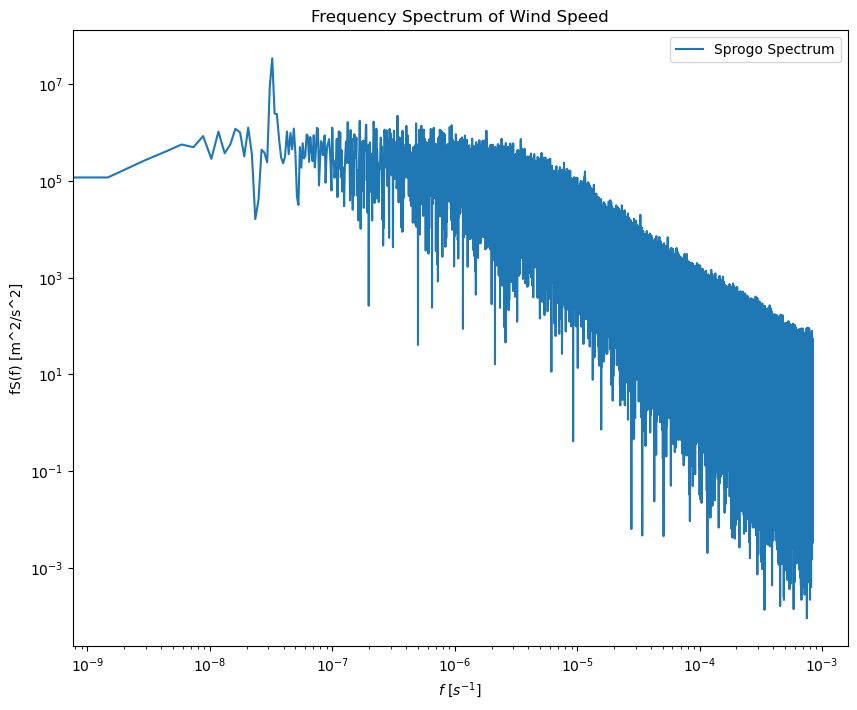

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16876\2479029154.py:88: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim((np.min(f_l), np.max(f_l)))


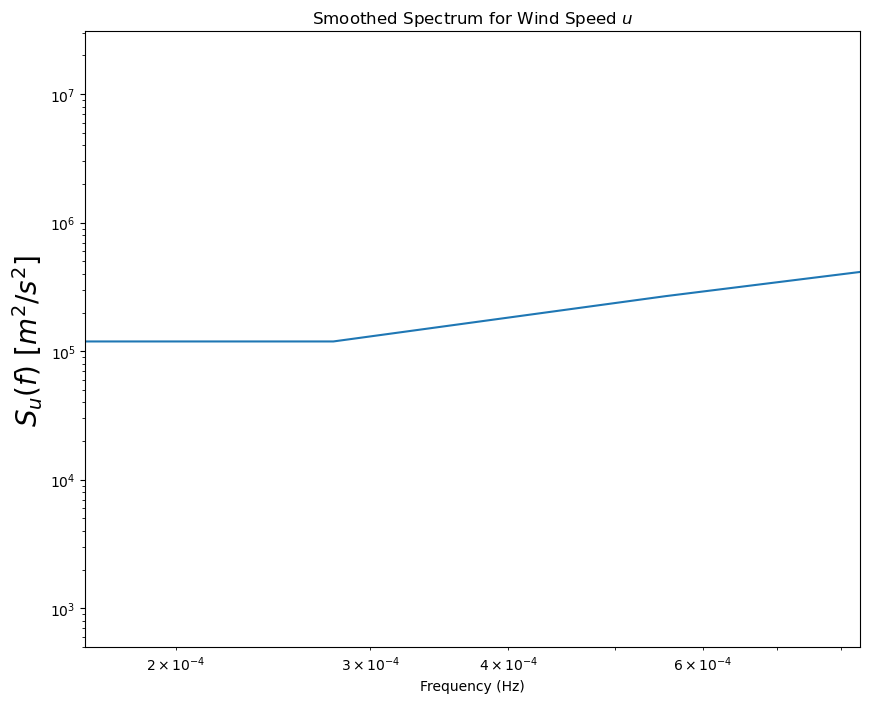

In [ ]:
# Assign headers to the Sprogø data
headers_sprogo = ["timestamp", "wind_speed", "wind_direction_67.5", "wind_direction_70"]

# Read the Sprogø dataset from 'sprog.tsv'
df_sprogo = pd.read_csv("sprog.tsv", sep="\t", names=headers_sprogo)

# Convert DataFrame to numpy array for more flexible processing
array_sprogo = df_sprogo.to_numpy(dtype=object)

# Replace erroneous values (99.99) in Sprogø data with NaN
for i in range(array_sprogo.shape[0]):
    for j in range(array_sprogo.shape[1]):
        if array_sprogo[i][j] == 99.99:
            array_sprogo[i][j] = np.nan

# Convert to float to ensure all data is numeric
array_sprogo = array_sprogo.astype(float)

# Extract wind speed, ignoring NaN values
wind_speed = array_sprogo[:, 1][~np.isnan(array_sprogo[:, 1])]

fs = 1/600 #Hz

k_guess = 1
N = len(wind_speed)
N_series = N // k_guess
spectra_avg_u = []

for k in range(k_guess):
    Series_k_u = wind_speed[k * N_series:(k + 1) * N_series]

    # Frequency Estimations
    N_f = N_series // 2
    f_l = np.fft.fftfreq(N_series, 1 / fs)[:N_f]

    # Spectra Calculation
    spectra_u = 1/(2*np.pi*N_series*fs)*np.abs(np.fft.fft(Series_k_u))**2

    spectra_avg_u.append(spectra_u[:N_f])

spectra_avg_u_1 = np.mean(spectra_avg_u, axis=0)

spectra_avg_u_1[0] = spectra_avg_u_1[1]
    

# Plot fS(f) vs f on a logarithmic scale
plt.figure(figsize=(10, 8))
plt.loglog(f_l, spectra_avg_u_1, label='Sprogo Spectrum')
plt.xlabel("$f \ [s^{-1}]$")
plt.ylabel("fS(f) [m^2/s^2]")
plt.title("Frequency Spectrum of Wind Speed")
#plt.grid(True, which="both")
plt.legend()
plt.show()

speed_1_filter_u = np.concatenate((speed_group_1_1_u, speed_group_1_2_u, speed_group_1_3_u, speed_group_1_4_u, speed_group_1_5_u))

# Group the spectra values within each decade
group_1_1_u = spectra_avg_u_1[0:len(decade_1_1)]
group_1_2_u = spectra_avg_u_1[len(decade_1_1):len(decade_1_2)]
group_1_3_u = spectra_avg_u_1[len(decade_1_2):len(decade_1_3)]
group_1_4_u = spectra_avg_u_1[len(decade_1_2):len(decade_1_4)]
group_1_5_u = spectra_avg_u_1[len(decade_1_4):len(decade_1_5)]

# Apply smoothing (mean averaging) to each group in two ways
values_group_1_2_u = np.mean([group_1_2_u[i:i+2] for i in np.arange(0, len(group_1_2_u) - 2, 2)], axis=1)

def calculate_means(group_u):
    means_u = np.mean([group_u[i:i+len(group_u)//16] for i in np.arange(0, len(group_u) - len(group_u)//16, len(group_u)//16)], axis=1)
    return means_u

# Smooth each group by applying the `calculate_means` function
values_group_1_3_u = calculate_means(group_1_3_u)
values_group_1_4_u = calculate_means(group_1_4_u)
values_group_1_5_u = calculate_means(group_1_5_u)

# Concatenate all smoothed values for plotting
values_1_filter_u = np.concatenate((group_1_1_u, values_group_1_2_u, values_group_1_3_u, values_group_1_4_u, values_group_1_5_u))

# Plot the smoothed spectrum
plt.figure(figsize=(10, 8))
plt.plot(decade_1, values_1_filter_u)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$S_u(f) \ [m^2/s^2]$", size=20)
plt.xlabel("Frequency (Hz)")
plt.xticks(size=15)
plt.xlim((np.min(f_l), np.max(f_l)))
plt.title("Smoothed Spectrum for Wind Speed $u$")
#plt.grid(True, which="both")
plt.show()



[1.20667056 1.21557206 1.2395639  ... 1.94587109 1.1383707  1.85333822]
[0.03662519 0.03961475 0.05296799 ... 4.06136887 4.38976852 4.52688585]
[3.98561779e+01 2.47425093e+01 1.83048590e+01 ... 3.51393802e-02
 3.51344991e-02 3.51296194e-02]


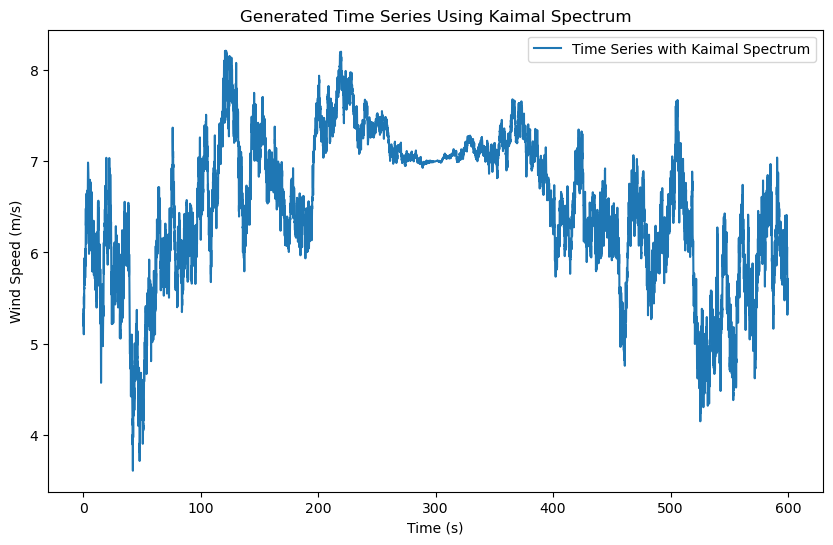

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (you can adjust these based on your needs)
T = 600 # Seconds
delta_t = 0.05  # Frequency resolution
N = int(T / delta_t)  # Length of the time series
f_s = 1/delta_t #Sampling frequency (Hz)
U = 7  # Mean wind speed (m/s)
z = 80  # Height (m)
u_star = 0.25  # Friction velocity (m/s)

frequencies = np.linspace(f_s/N, 1/delta_t, num=int(N/2))

# Define Kaimal spectrum function
def kaimal_spectrum(f, U, z, u_star):
    return (u_star**2 * 52.5 * z / U) / (1 + 33 * f * z / U)**(5/3)

# # Generate frequencies
# frequencies = np.fft.fftfreq(N, d=f)[:N//2]


# Generate random complex numbers (Gaussian distributed)
random_real = np.random.normal(0, 1, N//2)
random_imag = np.random.normal(0, 1, N//2)
X_tilde = random_real + 1j * random_imag
X_tilde_abs=np.abs(X_tilde)

print(X_tilde_abs)
X_tilde_sorted = np.sort(X_tilde_abs)
print(X_tilde_sorted)

# Compute Fourier amplitudes from Kaimal spectrum
sigma_f = np.sqrt(kaimal_spectrum(frequencies, U, z, u_star)*N/(2*np.pi*f_s))
print(sigma_f)

# Apply Fourier amplitudes
X_tilde *= sigma_f

# Expand X as per the given structure in the image
X = np.zeros(N, dtype=complex)
X[:N//2] = X_tilde
X[N//2:] = np.conj(X_tilde[::-1])


# Perform inverse Fourier transform to obtain the time series
x_n = np.fft.ifft(X).real*(2*np.pi/delta_t) # Normalize the result if needed

u = x_n + U

# Plot the generated time series
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 600, len(u)), u, label="Time Series with Kaimal Spectrum")
plt.xlabel("Time (s)")
plt.ylabel("Wind Speed (m/s)")
plt.title("Generated Time Series Using Kaimal Spectrum")
plt.legend()
plt.show()
